Q 2) Extract reviews of any product from ecommerce website like amazon and Perform emotion mining

# Extract reviews

## Web Scraping — Amazon Customer Reviews

In [1]:
# I work on the product below
import webbrowser
webbrowser.open('https://www.amazon.in/Samsung-Galaxy-10-1-Wi-Fi-Silver/dp/B07SSTH14H')
webbrowser

<module 'webbrowser' from 'D:\\anaconda\\installation\\lib\\webbrowser.py'>

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

In [3]:
failed_page = []
cust_name = []
cust_rate = []
rev_date = []
rev_title = []
rev_text = []
for p in range(1,50):
  link = "https://www.amazon.in/Samsung-Galaxy-10-1-Wi-Fi-Silver/product-reviews/B07SSTH14H/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(p)
  page = requests.get(link)
  if(str(page) == "<Response [200]>"):
    soup = BeautifulSoup(page.content,'html.parser')
    names = soup.select('span.a-profile-name')[2:]
    stars = soup.select('span.a-icon-alt')[3:]
    dates = soup.select('span.review-date')[2:]
    titles = soup.select('a.review-title span')
    reviews = soup.select('span.review-text span')
    for i in range(10):
      cust_name.append(names[i].getText())
      cust_rate.append(stars[i].getText().rstrip(" out of 5 stars"))
      rev_date.append(dates[i].getText().lstrip("Reviewed in India on "))
      rev_title.append(titles[i].getText())
      rev_text.append(reviews[i].getText().strip("\n "))
  else:
    failed_page.append(p)

##  Make a Data Frame

In [4]:
df = pd.DataFrame()   ## empty dataframe
df['Date'] = rev_date
df['Customer Name'] = cust_name
df['Ratings'] = cust_rate
df['Review Title'] = rev_title
df['Reviews'] = rev_text
df.index = df.index+1
df

,Date,Customer Name,Ratings,Review Title,Reviews
1,1 July 2019,Satyaki Dandi,4.0,A more than decent buy for the price,"Pros:1. The price. For this range,the other op..."
2,29 June 2019,Kapil Sharma,5.0,Cheap and best...love it,Mindblowing tablet this is the cheap and best....
3,1 July 2019,Harmeet,5.0,"Brilliant , value for money. Looks and works l...","Ok so, i am a basic user buying a tab for educ..."
4,12 July 2019,AdiB,5.0,Great value for money for simple jobs,At Rs15k price it serves my purpose of1. Brows...
5,10 July 2019,Vikramaditya Reddy,5.0,Best Tab of the year,I have unboxed this Samsung galaxy tab A 2019 ...
...,...,...,...,...,...
406,2 March 2021,R S SIVA KUMAR,3.0,Screen too good and higher weight,Screen quality is really good. Weight is on hi...
407,14 September 2020,Deeppreet Bindra,3.0,Overall value for money!,Overall value for money! But the touch is not ...
408,24 August 2020,Gopal Dutta,1.0,Go for mini screentouch laptop,Not worthy
409,12 August 2020,Prasanthi P.,5.0,Received happily,excellent product who wants tab you can buy this.


## Preprocessing

In [5]:
# remove both the leading and the trailing characters
df = [Reviews.strip() for Reviews in df.Reviews]
# removes empty strings, because they are considered in Python as False
df= [Reviews for Reviews in df if Reviews] 
df[0:5]

["Pros:1. The price. For this range,the other options available are too old to soon become expensive photo albums,or not upto the mark.2. The screen,though not amoled,has a crisp feel about it. I think its IPS...nevertheless its more than enough for reading,watching videos and other regular stuff. Though not a top notch screen for first person shooter games, it works just fine for all your other stuff. I'm not a avid gamer,so it doesn't really matter to me.3. The dual speakers are pretty loud and has more than expected crispness to the audio. There is a con though with the speakers,that I'll talk about later.4. Near stock android , and not overloaded with changes. So, it has a nice , easy to use , feel to it.5. The metal back and the compact size:screen ratio, makes it look and feel pretty premium .6. It has a nice big battery. Lasts me through the entire day, with casual use, with some to spare.7. 3.5mm Jack. 'Nuff said.8. No physical buttons. Really makes the tab , look and feel that

In [6]:
# Now we check sentiment score for sentences(reviews)
from nltk import tokenize
sentences = tokenize.sent_tokenize(' '.join(df))
sentences[5:15]

['Though not a top notch screen for first person shooter games, it works just fine for all your other stuff.',
 "I'm not a avid gamer,so it doesn't really matter to me.3.",
 'The dual speakers are pretty loud and has more than expected crispness to the audio.',
 "There is a con though with the speakers,that I'll talk about later.4.",
 'Near stock android , and not overloaded with changes.',
 'So, it has a nice , easy to use , feel to it.5.',
 'The metal back and the compact size:screen ratio, makes it look and feel pretty premium .6.',
 'It has a nice big battery.',
 'Lasts me through the entire day, with casual use, with some to spare.7.',
 '3.5mm Jack.']

In [7]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,Pros:1.
1,The price.
2,"For this range,the other options available are..."
3,"The screen,though not amoled,has a crisp feel ..."
4,I think its IPS...nevertheless its more than e...
...,...
1084,Weight is on higher side.
1085,So please make sure that you are ok with the w...
1086,But the touch is not very effective as compare...
1087,Not worthy excellent product who wants tab you...


## Affin laxicon

In [8]:
#sentiment analysis
afinn = pd.read_csv("D:/jupyter notebook workspace/Text Mining NLP-1and2/Afinn.csv", sep=',', encoding='latin-1')
afinn

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [9]:
afinn.shape

(2477, 2)

In [10]:
affinity_scores = afinn.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [11]:
import spacy
nlp = spacy.load('en_core_web_sm')
#custom function: score each word in a sentence in lemmatised form but calculate score for whole original sentences
sentiment_laxicon = affinity_scores

In [12]:
sentiment_laxicon

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [13]:
def calculate_sentiment (text: str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score += sentiment_laxicon.get(word.lemma_, 0)
    return sent_score

In [14]:
# calculate sentiment value and add to sent_df
sent_df['sentiment_value'] = sent_df['sentence'].apply(calculate_sentiment)
sent_df

,sentence,sentiment_value
0,Pros:1.,0
1,The price.,0
2,"For this range,the other options available are...",0
3,"The screen,though not amoled,has a crisp feel ...",0
4,I think its IPS...nevertheless its more than e...,0
...,...,...
1084,Weight is on higher side.,0
1085,So please make sure that you are ok with the w...,1
1086,But the touch is not very effective as compare...,2
1087,Not worthy excellent product who wants tab you...,6


In [15]:
# how many words are in the sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0        1
1        2
2       19
3        9
4       15
        ..
1084     5
1085    17
1086    12
1087    11
1088     5
Name: word_count, Length: 1089, dtype: int64

In [16]:
sent_df

,sentence,sentiment_value,word_count
0,Pros:1.,0,1
1,The price.,0,2
2,"For this range,the other options available are...",0,19
3,"The screen,though not amoled,has a crisp feel ...",0,9
4,I think its IPS...nevertheless its more than e...,0,15
...,...,...,...
1084,Weight is on higher side.,0,5
1085,So please make sure that you are ok with the w...,1,17
1086,But the touch is not very effective as compare...,2,12
1087,Not worthy excellent product who wants tab you...,6,11


In [17]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
997,I am using this for last 10 days.Battery is go...,16,32
807,good experience but no sim supported Screen qu...,17,34
1025,Great screen quality and solid buildSound loud...,17,33
328,the overall rating for this tablet is 4 bcoz i...,19,248
281,"Battery backup is amazing, sound quality is su...",19,25
274,I was bit skeptical to buy this TAB but after ...,20,225
957,The screen has a slight yellowish tint which i...,22,93
143,I was using this for media consumption.Lets go...,23,91
329,"This is best tablet with great price , screen ...",24,124
988,Its good product.. Screen resolution is amazin...,25,56


## Description

In [18]:
# sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    1089.000000
mean        2.044995
std         3.659797
min       -11.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        25.000000
Name: sentiment_value, dtype: float64

#### we see that above the minimum sentiment value is -11 and maximum sentiment value is 25
#### AND mean towards 2 ( i. e. overall sentiment score is positive)

In [19]:
# Sentiment score of the whole review <0
sent_df[sent_df['sentiment_value']<0]

,sentence,sentiment_value,word_count
9,"Near stock android , and not overloaded with c...",-1,9
16,No physical buttons.,-1,3
20,Can't overload the phone.,-1,4
24,No stereo separation at all.,-1,5
25,Can be really annoying at times.3.,-2,6
...,...,...,...
1027,Till now I have no problem.,-3,6
1047,Otherwise it's performance is as expected only...,-1,13
1057,Galaxy Tab has developed a battery problem.,-2,7
1060,You can go for it without any doubt .,-1,9


In [20]:
# Sentiment score of the whole review >=0
sent_df[sent_df['sentiment_value']>=10]

,sentence,sentiment_value,word_count
59,We expect transparency from Amazon..... Best A...,13,27
143,I was using this for media consumption.Lets go...,23,91
274,I was bit skeptical to buy this TAB but after ...,20,225
281,"Battery backup is amazing, sound quality is su...",19,25
321,We have waited for this tab almost a month as ...,14,102
328,the overall rating for this tablet is 4 bcoz i...,19,248
329,"This is best tablet with great price , screen ...",24,124
333,"#For pdf study , online classes, notes...etc#M...",16,61
339,"The prouduct great,exelent quility,original pr...",12,42
346,"Box content- Tablet,Charger adaptor,type c cab...",15,178


In [21]:
sent_df['index']=range(0,len(sent_df))

In [22]:
sent_df=sent_df[['index']+['sentence']+['word_count']+['sentiment_value']]
sent_df.reset_index(drop=True)
sent_df

,index,sentence,word_count,sentiment_value
0,0,Pros:1.,1,0
1,1,The price.,2,0
2,2,"For this range,the other options available are...",19,0
3,3,"The screen,though not amoled,has a crisp feel ...",9,0
4,4,I think its IPS...nevertheless its more than e...,15,0
...,...,...,...,...
1084,1084,Weight is on higher side.,5,0
1085,1085,So please make sure that you are ok with the w...,17,1
1086,1086,But the touch is not very effective as compare...,12,2
1087,1087,Not worthy excellent product who wants tab you...,11,6


### Assign labels

In [23]:
sentiment = []
for i in range(len(sent_df)):
  c = sent_df.loc[i]['sentiment_value']
  if c>0:
    sentiment.append("positive")
  elif c<0:
    sentiment.append("Negative")
  else:
    sentiment.append("Neutral")
sent_df['Sentiment']=sentiment
sent_df

<ipython-input-23-1de013f99034>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_df['Sentiment']=sentiment


,index,sentence,word_count,sentiment_value,Sentiment
0,0,Pros:1.,1,0,Neutral
1,1,The price.,2,0,Neutral
2,2,"For this range,the other options available are...",19,0,Neutral
3,3,"The screen,though not amoled,has a crisp feel ...",9,0,Neutral
4,4,I think its IPS...nevertheless its more than e...,15,0,Neutral
...,...,...,...,...,...
1084,1084,Weight is on higher side.,5,0,Neutral
1085,1085,So please make sure that you are ok with the w...,17,1,positive
1086,1086,But the touch is not very effective as compare...,12,2,positive
1087,1087,Not worthy excellent product who wants tab you...,11,6,positive


# Visualization

<AxesSubplot:>

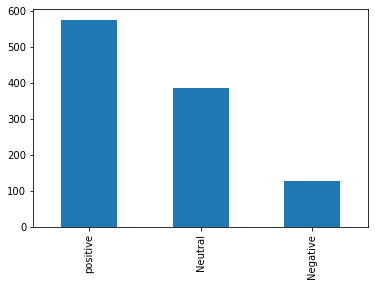

In [24]:
sent_df['Sentiment'].value_counts().plot(kind='bar')

#### Positive reviews are maximum followed by Neutral and followed by Negative reviews

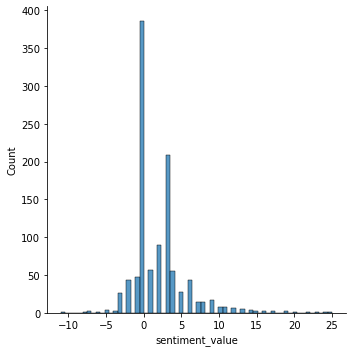

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(sent_df['sentiment_value'])

#### from displot maximum reviews on  0 (sentiment value)

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

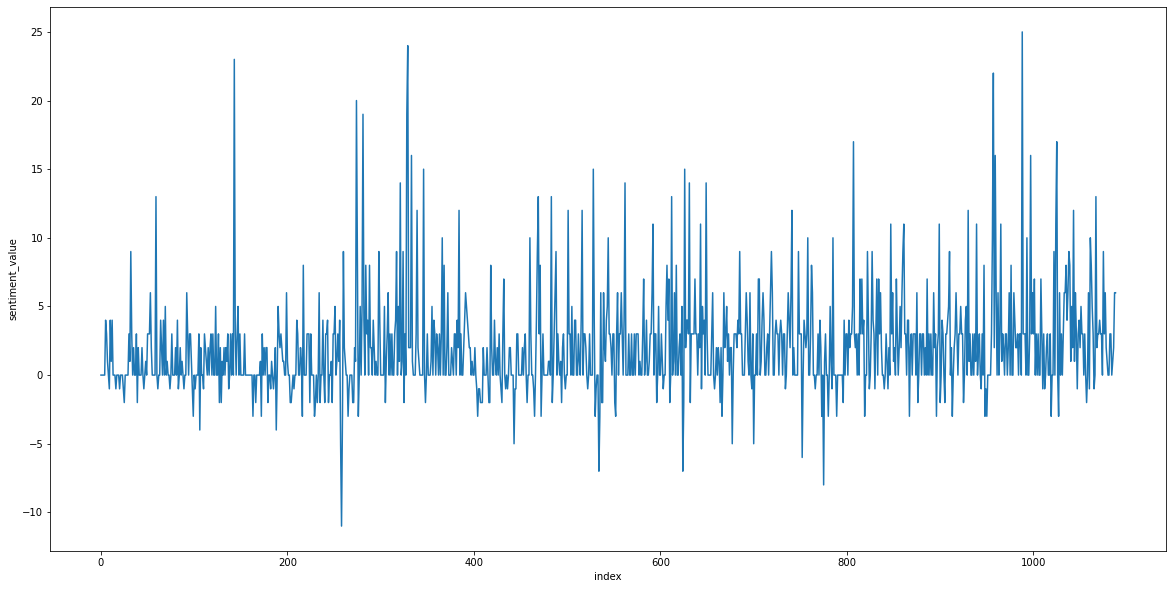

In [26]:
plt.figure(figsize=(20,10))
sns.lineplot(x='index', y='sentiment_value', data=sent_df)

#### from line plot we say that most sebtiment values in between 0 to 3

<AxesSubplot:title={'center':'SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT'}, xlabel='word_count', ylabel='sentiment_value'>

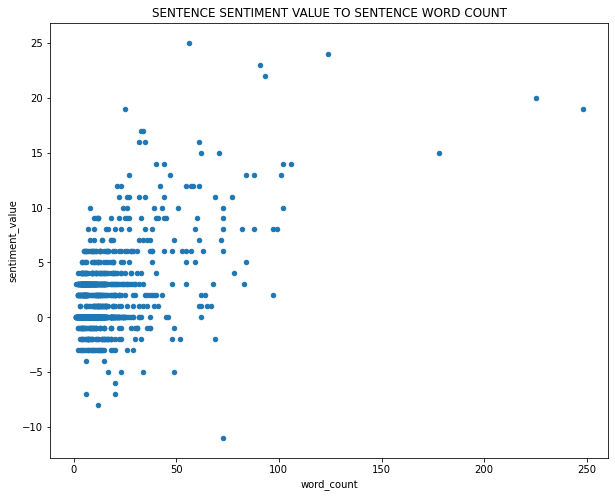

In [27]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(10,8), title='SENTENCE SENTIMENT VALUE TO SENTENCE WORD COUNT')

### from scatter plot we say that most sentiment values of sentence in between -5 to 10 with word count of sentence in between 0 to 40